In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [96]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [99]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

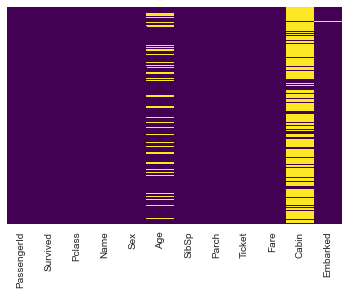

In [100]:
sns.heatmap(train.isnull(),cmap='viridis', cbar=False, yticklabels=False)

In [101]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

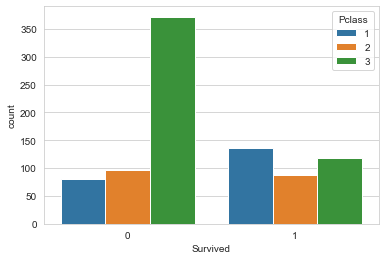

In [102]:
#sns.set_style('whitegrid')
train.columns
#sns.set_style('whitegrid')
train.columns
sns.countplot(x='Survived', hue='Pclass', data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

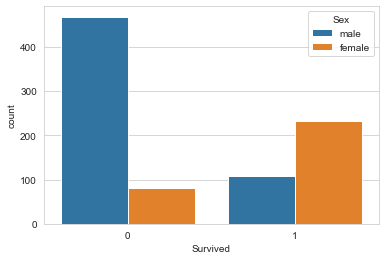

In [103]:

sns.countplot(x='Survived', hue='Sex', data = train)

<AxesSubplot:>

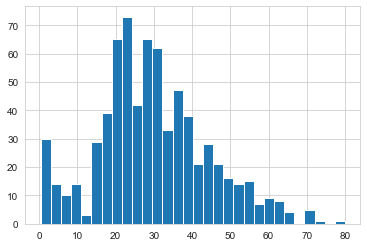

In [104]:
train['Age'].hist(bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

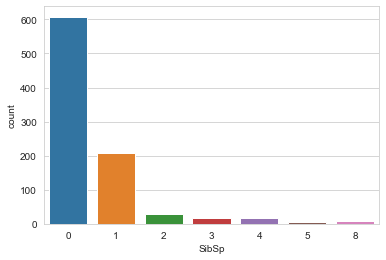

In [105]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

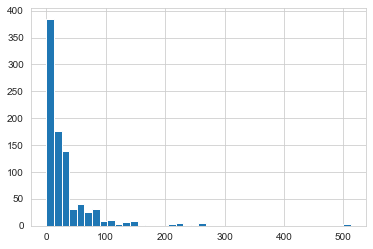

In [106]:
train['Fare'].hist(bins=40)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

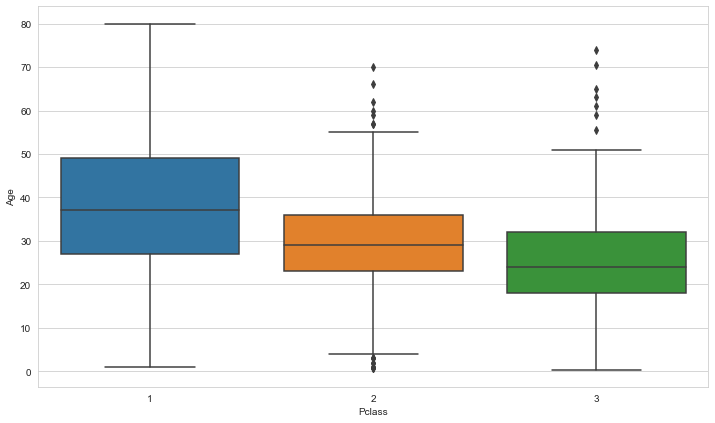

In [107]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [108]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [109]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        
        if pclass == 1:
            return 37
        
        elif pclass == 2:
            return 29
        
        else:
            return 24
    else:
        return age

In [110]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

In [ ]:
def impute_Age():
    pass


train['Age'] = train[['Age','Pclass']].apply(impute_age, axis = 1)

In [111]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [112]:
train['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

<AxesSubplot:xlabel='Embarked', ylabel='count'>

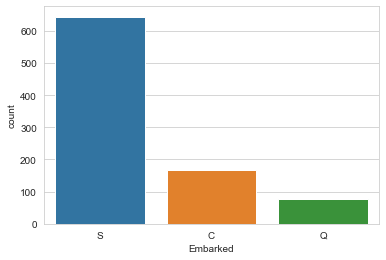

In [113]:
sns.countplot(x='Embarked',data=train)

In [114]:
train['Embarked'] = train['Embarked'].fillna('S')

In [115]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<AxesSubplot:>

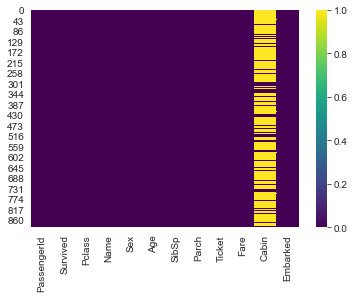

In [116]:
sns.heatmap(train.isnull(), cmap='viridis')

In [117]:
train.drop('Cabin', axis = 1, inplace=True)

In [118]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [120]:
sex = pd.get_dummies(train['Sex'], drop_first = True)

In [ ]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [121]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [122]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [123]:
train.drop(['Sex','Embarked','Name','Ticket'], axis = 1, inplace=True)

In [124]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [125]:
train = pd.concat([train,sex,embark], axis = 1)

In [126]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X = train.drop(['Survived'], axis = 1)
y = train['Survived']

In [129]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1,0,1
887,888,1,19.0,0,0,30.0000,0,0,1
888,889,3,24.0,1,2,23.4500,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0


In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10, random_state = 101)
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train,y_train)

/Users/sandeepsangole/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [132]:
pred = logisticRegression.predict(X_test)

In [133]:
pred

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[46  5]
 [16 23]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        51
           1       0.82      0.59      0.69        39

    accuracy                           0.77        90
   macro avg       0.78      0.75      0.75        90
weighted avg       0.78      0.77      0.76        90



In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)

In [135]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[46  5]
 [16 23]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        51
           1       0.82      0.59      0.69        39

    accuracy                           0.77        90
   macro avg       0.78      0.75      0.75        90
weighted avg       0.78      0.77      0.76        90



In [136]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators=1000)
xgboost.fit(X_train,y_train)
xg_pred = xgboost.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


/Users/sandeepsangole/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[46  5]
 [16 23]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        51
           1       0.82      0.59      0.69        39

    accuracy                           0.77        90
   macro avg       0.78      0.75      0.75        90
weighted avg       0.78      0.77      0.76        90



In [141]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [147]:
ann = Sequential()
ann.add(Dense(units=32,activation = 'relu', input_dim=9))
ann.add(Dense(units=32,activation = 'relu', input_dim=9))
ann.add(Dense(units=1,activation = 'sigmoid', input_dim=9))

ann.compile(optimizer ='adam',
           loss ='mean_squared_error',
           metrics=['accuracy'])



In [149]:
ann.fit(X_train,y_train,batch_size=32,verbose=0)

In [151]:
ann_pred = ann.predict(X_test)
ann_pred =[1 if y>=0.5 else 0 for y in ann_pred]
print(ann_pred)
print(confusion_matrix(y_test,ann_pred))
print(classification_report(y_test,ann_pred))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[51  0]
 [39  0]]
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        51
           1       0.00      0.00      0.00        39

    accuracy                           0.57        90
   macro avg       0.28      0.50      0.36        90
weighted avg       0.32      0.57      0.41        90



/Users/sandeepsangole/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sandeepsangole/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sandeepsangole/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r